In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [5]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [7]:
df = pd.read_csv('churn.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,500.95000,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,9000.10000,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,9500.05000,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


In [11]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [12]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['RowNumber', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [13]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]

In [15]:
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

In [16]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()

Tenure
0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: count, dtype: int64

In [17]:
# Frequency of churn group according to Tenure
churn["Tenure"].value_counts().sort_values()

Tenure
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: count, dtype: int64

In [18]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_values()

NumOfProducts
3      46
1    3675
2    4242
Name: count, dtype: int64

In [19]:
# Frequency of churn group according to NumOfProducts
churn["NumOfProducts"].value_counts().sort_values()

NumOfProducts
4      60
3     220
2     348
1    1409
Name: count, dtype: int64

In [20]:
# examining the HasCrCard of the not_churn group
not_churn["HasCrCard"].value_counts()

HasCrCard
1    5631
0    2332
Name: count, dtype: int64

In [21]:
# examining the HasCrCard of the churn group
churn["HasCrCard"].value_counts()

HasCrCard
1    1424
0     613
Name: count, dtype: int64

In [22]:
# examining the IsActiveMember of the not_churn group
not_churn["IsActiveMember"].value_counts()

IsActiveMember
1    4416
0    3547
Name: count, dtype: int64

In [23]:
# examining the IsActiveMember of the churn group
churn["IsActiveMember"].value_counts()

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

In [24]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

Geography
Germany    1695
Spain      2064
France     4204
Name: count, dtype: int64

In [25]:
# Frequency of not_churn group according to Gender
not_churn.Gender.value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [26]:
# Let's examine the credit score of the not_churn group
not_churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
5%        492.000000
25%       585.000000
50%       653.000000
75%       718.000000
90%       778.000000
95%       812.000000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

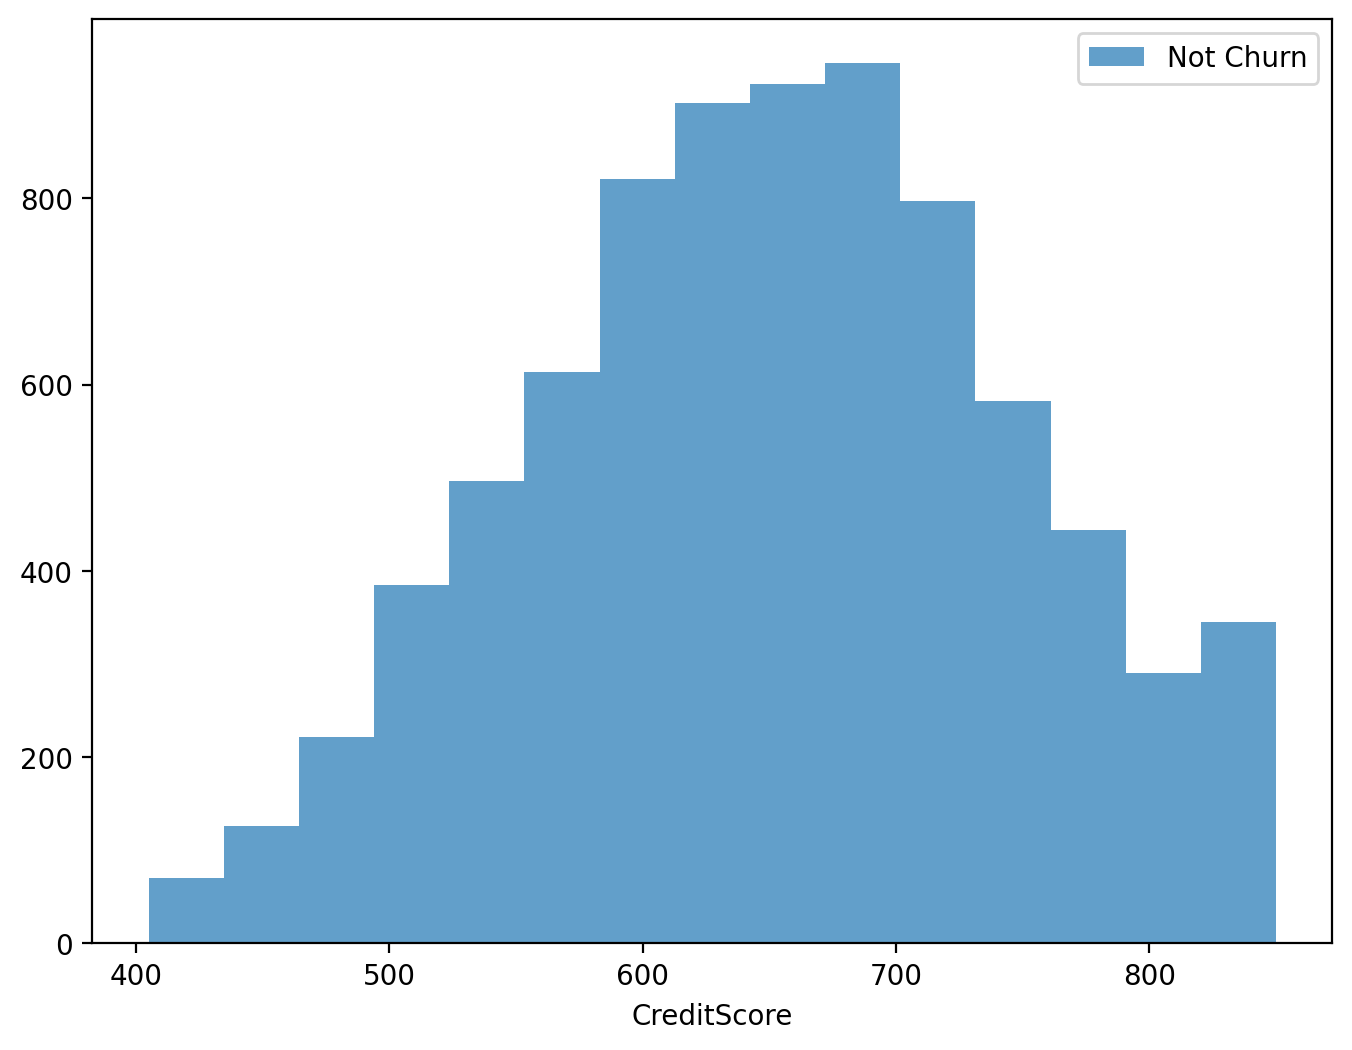

In [27]:
# distribution of the Credit Score for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(not_churn["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [28]:
# Let's examine the credit score of the churn group
churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
5%        479.000000
25%       578.000000
50%       646.000000
75%       716.000000
90%       776.400000
95%       812.200000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

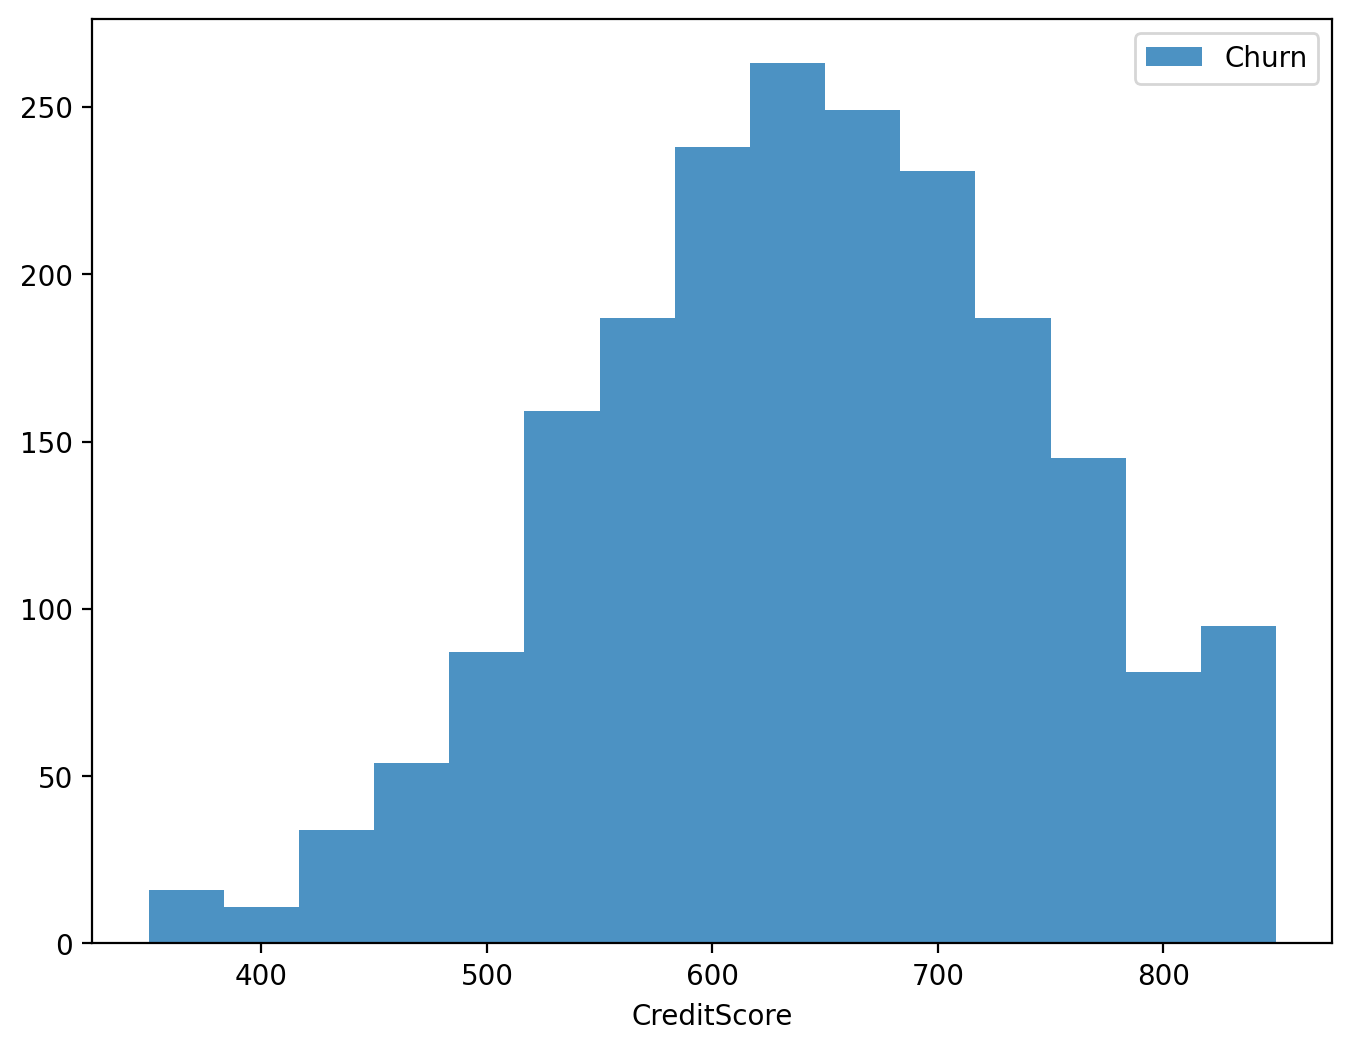

In [29]:
# distribution of the Credit Score for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(churn["CreditScore"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

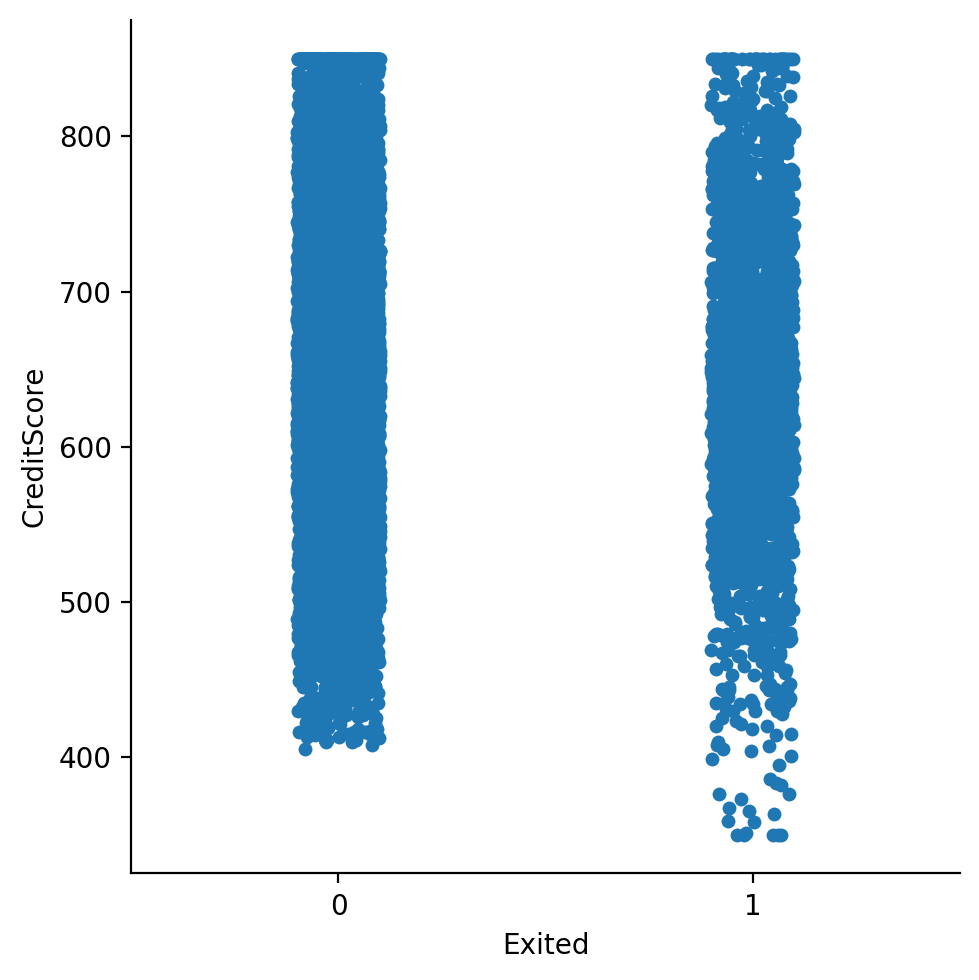

In [32]:
sns.catplot(x="Exited", y="CreditScore", data=df)

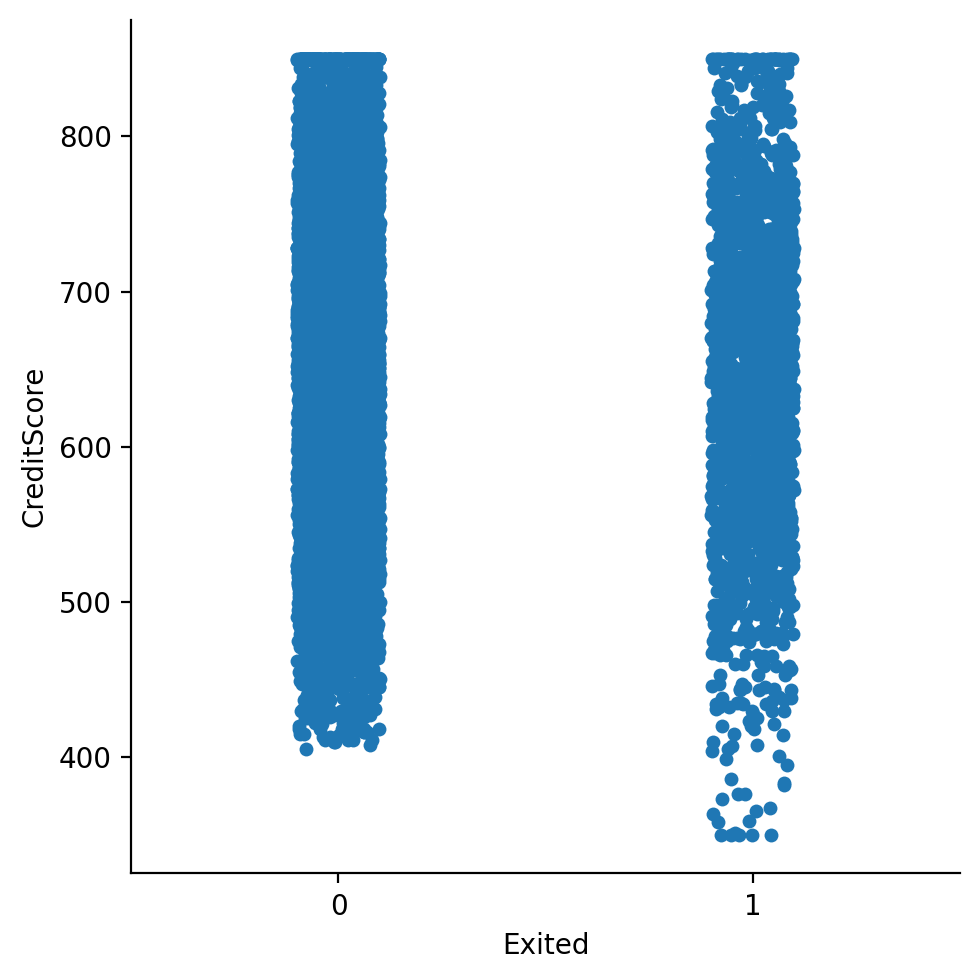

In [33]:
sns.catplot(x="Exited", y="CreditScore", data=df)


In [34]:
# examining the age of the not_churn group
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
5%         24.000000
25%        31.000000
50%        36.000000
75%        41.000000
90%        49.000000
95%        59.000000
99%        73.000000
max        92.000000
Name: Age, dtype: float64

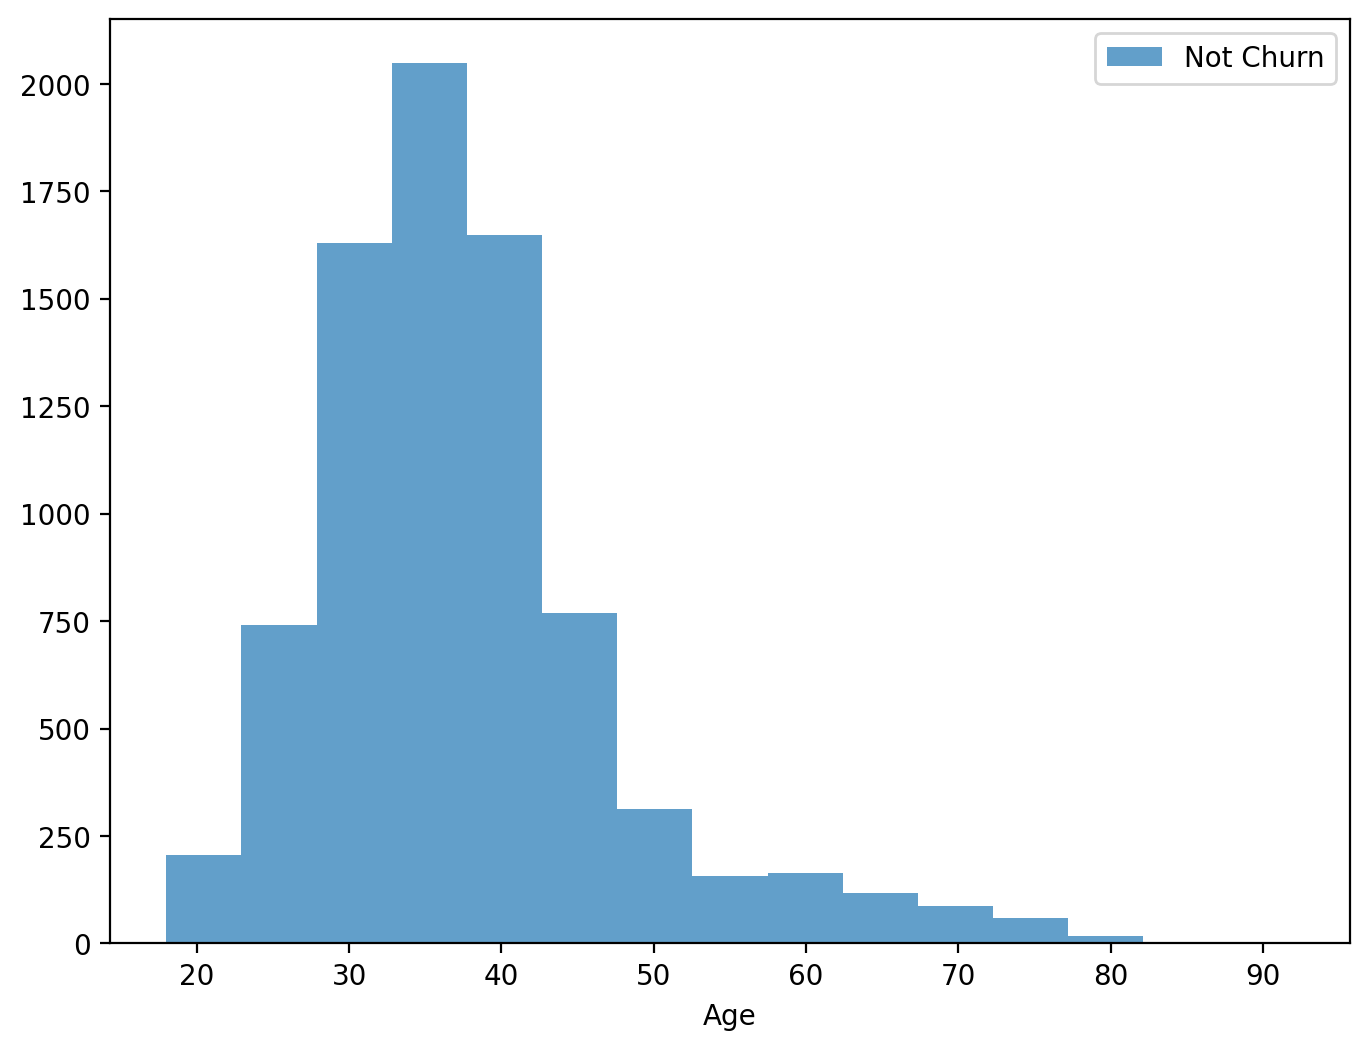

In [35]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [36]:
# examine the age of the churn group
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
5%         29.000000
25%        38.000000
50%        45.000000
75%        51.000000
90%        58.000000
95%        61.000000
99%        68.000000
max        84.000000
Name: Age, dtype: float64

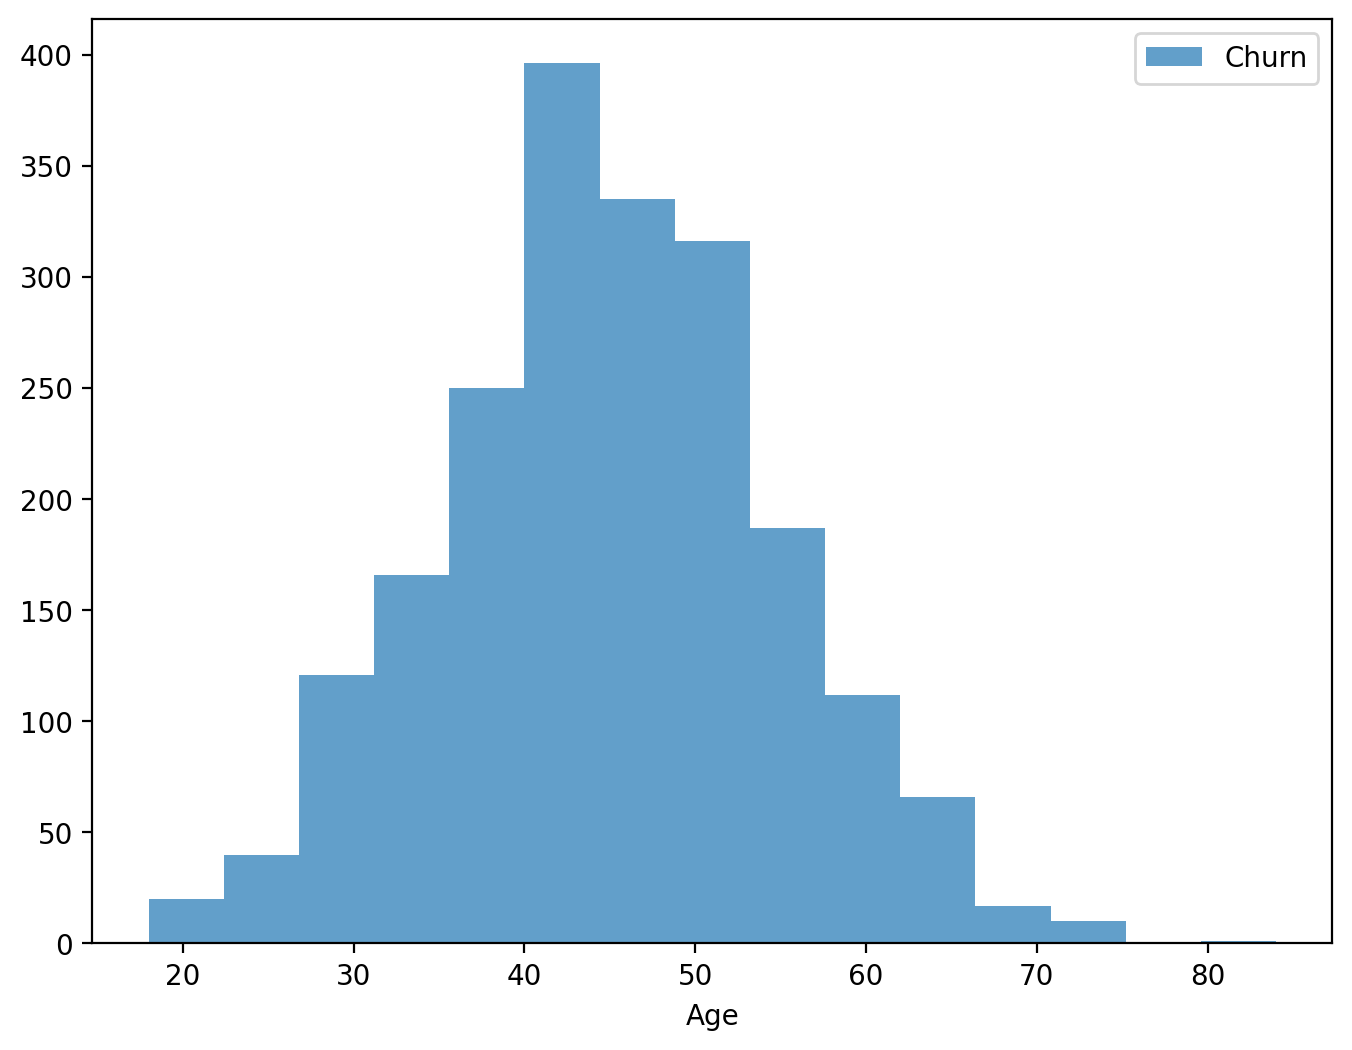

In [37]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

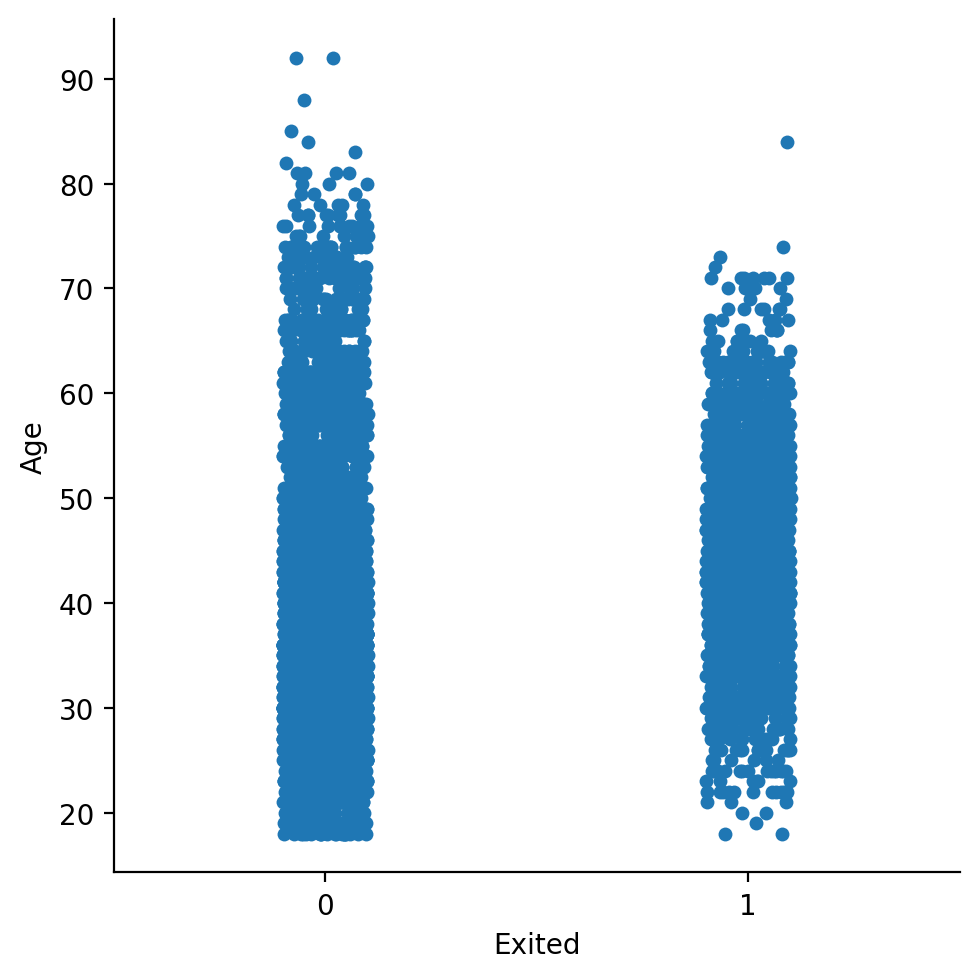

In [39]:
sns.catplot(x="Exited", y="Age", data = df)

In [1]:
pip install xgboost lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 🧠 Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [3]:
#  Load your dataset
df = pd.read_csv("Churn.csv")  # replace with your actual CSV filename

#  View columns and data structure
print(df.columns)
print(df.head())


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   


In [5]:
# Step 1: Load Dataset
df = pd.read_csv("Churn.csv")  # change file name if needed

# Step 2: Drop non-useful columns
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# Step 3: Encode categorical variables
df = pd.get_dummies(df, drop_first=True)  # Converts Gender, Geography, etc.

# Step 4: Split features & target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Step 5: Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Split into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 7: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}


In [7]:
# Step 8: Train and evaluate
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    })

# Step 9: Show results
results_df = pd.DataFrame(results)
print("\n✅ Final Results:")
print(results_df.sort_values(by="Accuracy", ascending=False))


Training Logistic Regression...
Training KNN...
Training SVC...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


C:\Users\dell\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:56:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training LightGBM...
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Training CatBoost...

✅ Final Results:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
6              XGBoost    0.8695   0.717105  0.554707  0.625538  0.750596
4        Random Forest    0.8680   0.759036  0.480916  0.588785  0.721790
8             CatBoost    0.8680   0.747126  0.496183  0.596330  0.727556
5    Gradient Boosting    0.8675   0.750000  0.488550  0.591680  0.724362
7             LightGBM    0.8650   0.732075  0.493639  0.589666  0.724728
2     

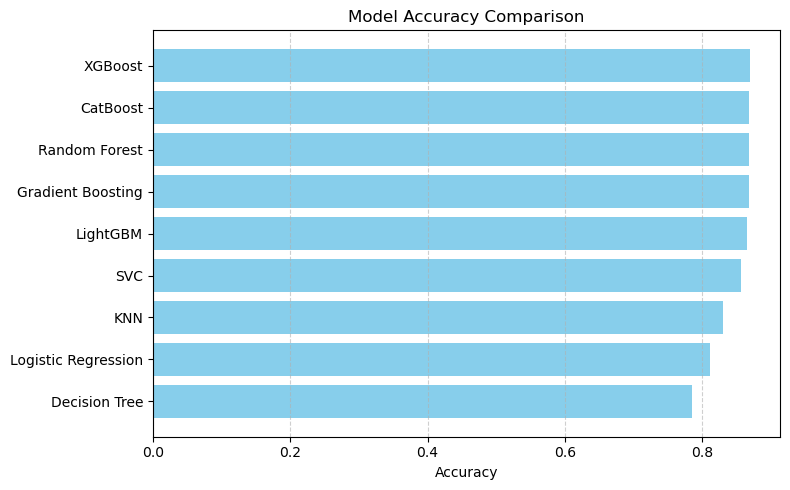

In [11]:
import matplotlib.pyplot as plt

# Sort results by Accuracy for better visualization
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=True)

# Plotting bar chart
plt.figure(figsize=(8, 5))
plt.barh(results_df_sorted["Model"], results_df_sorted["Accuracy"], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


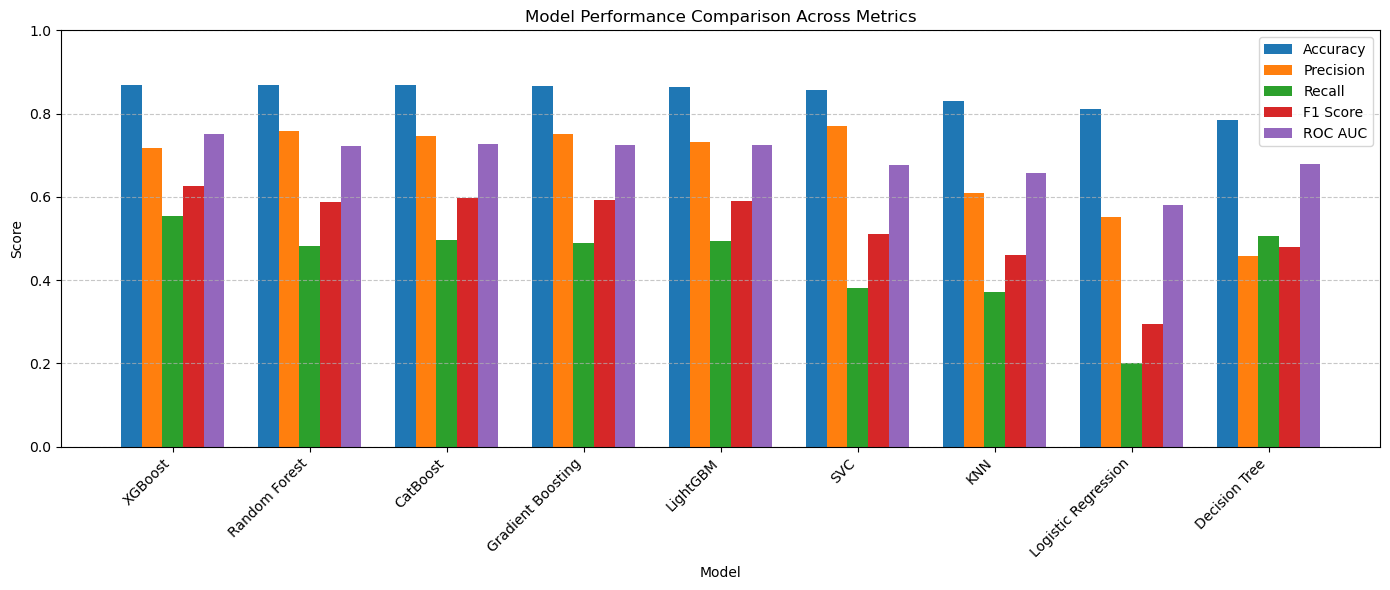

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Select and sort top models by accuracy
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

# Extract values
models = results_df_sorted["Model"]
x = np.arange(len(models))  # positions for x-axis
width = 0.15  # width of each bar

# Create plot
plt.figure(figsize=(14, 6))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df_sorted[metric], width, label=metric)

# Axis formatting
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison Across Metrics")
plt.xticks(x + width * 2, models, rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
